In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### MNIST 손글씨 데이터 불러오기

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

2025-12-04 09:31:32.615376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 09:31:33.350142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-04 09:31:36.310384: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

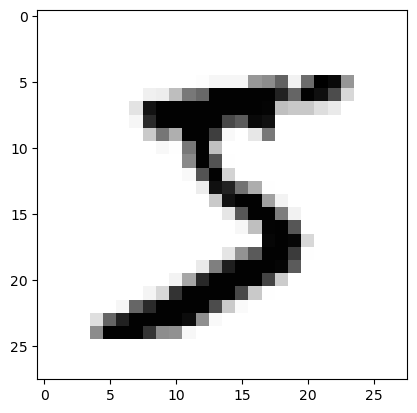

In [8]:
plt.imshow(X_train[0], cmap="Grays")
plt.show()

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
pd.DataFrame(X_train[2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0
6,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0
7,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0
8,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0
9,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0


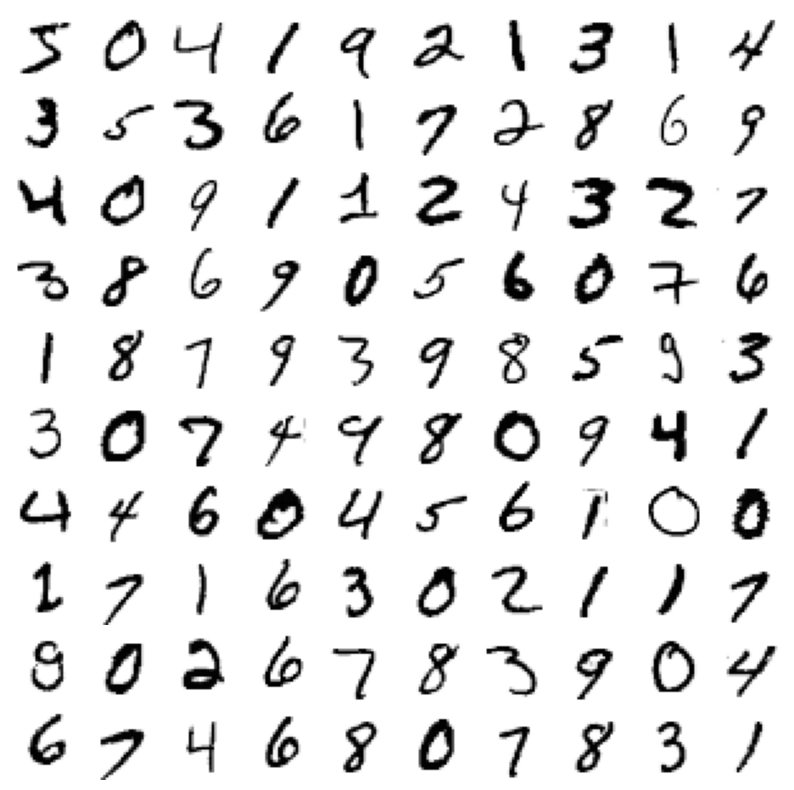

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(10,10))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_train[i], cmap="Grays")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# 이미지 데이터 훈련을 위한 전처리
* 정규화 = X / 255 => 0~1 범위로 변환, -1 ~ 1 범위로 변환
* y 종속변수 = one-hot encoding, to_categorical()

In [13]:
X_train.shape #3차원 데이터로는 분석이 어려움 -> 2차원으로 변환

(60000, 28, 28)

In [16]:
X_train.shape[1] * X_train.shape[2]

784

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [19]:
X_train.shape

(60000, 784)

In [20]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [21]:
X_test.shape

(10000, 784)

In [22]:
X_train[:2, :]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 784), dtype=uint8)

# 데이터 정규화 / 255
* 나누기 255 하면 됨

In [23]:
X_train = X_train / 255
X_test = X_test / 255

# 종속변수 y => one-hot encoding, to_categorical

In [24]:
y_train.shape

(60000,)

In [26]:
# y에 클래스 수 계산
len(np.unique(y_train))

10

In [27]:
# 카테고리 수를 입력해서 one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

#카테고리 변수는 카테고리 개수를 알려줘야 하기 때문에 len() 해봐야함

In [28]:
y_train.shape

(60000, 10)

In [30]:
y_train[:2, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# DNN 훈련 및 예측 
* 이미지 분석시 은닉층 노드: 작은 것 -> 큰 것 -> 작은 것 

In [31]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

I0000 00:00:1764810721.204125     570 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,162 (5.56 MB)

 Trainable params: 1,457,162 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-12-04 10:17:49.363818: I external/local_xla/xla/service/service.cc:163] XLA service 0x72124000b190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-04 10:17:49.363914: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-04 10:17:49.426329: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-04 10:17:49.670912: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


11/45 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5421 - loss: 1.5331

I0000 00:00:1764811071.882599    1621 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8619 - loss: 0.4786 - val_accuracy: 0.9431 - val_loss: 0.1898
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9578 - loss: 0.1408 - val_accuracy: 0.9602 - val_loss: 0.1325
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9738 - loss: 0.0872 - val_accuracy: 0.9645 - val_loss: 0.1136
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9826 - loss: 0.0580 - val_accuracy: 0.9705 - val_loss: 0.0965
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9889 - loss: 0.0387 - val_accuracy: 0.9755 - val_loss: 0.0847
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9929 - loss: 0.0241 - val_accuracy: 0.9739 - val_loss: 0.0917
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9694 - val_loss: 0.1096
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9959 - loss: 0.0152 - val_accuracy: 0.9753 - val_l

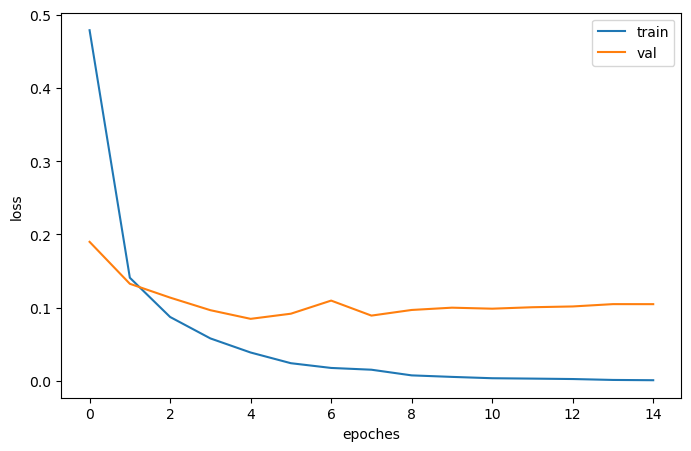

In [34]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_MLP.keras"
checkpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=1000,
                   callbacks=[checkpoint, early_stop])
print("test 정확도: ", model.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# CNN 합성곱 신경망으로 이미지 분석하기
* DNN은 이미지 데이터를 1차원으로 펼쳐서 분석
* CNN은 2차원 상태 그대로 분석

In [35]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

## CNN을 위한 데이터 전처리 3차원 => 4차원
* (행(전체 데이터 개수), 이미지 사이즈(행, 열), 색레이어수(흑백=1, 컬러=3))

In [36]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255

In [39]:
X_train.shape

(60000, 28, 28, 1)

In [40]:
X_test.shape

(10000, 28, 28, 1)

# y 종속변수 => one-hot encoding, to_categorical(y, class수)

In [44]:
n_class = len(np.unique(y_train))

In [46]:
y_train = to_categorical(y_train, n_class)
y_test = to_categorical(y_test, n_class)

# CNN 합성 네트워크를 위한 layers
* Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [47]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [55]:
model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(25))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,635 (4.61 MB)

 Trainable params: 1,209,635 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-12-04 10:41:47.808546: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1000,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-12-04 10:41:48.095313: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1000,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,32,26,26]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5492 - loss: 1.3774

2025-12-04 10:42:01.391132: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1000,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-12-04 10:42:01.591997: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1000,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,32,26,26]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.7429 - loss: 0.8230 - val_accuracy: 0.9245 - val_loss: 0.2609
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.9341 - loss: 0.2186 - val_accuracy: 0.9571 - val_loss: 0.1495
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.9656 - loss: 0.1174 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.9773 - loss: 0.0779 - val_accuracy: 0.9769 - val_loss: 0.0765
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.9828 - loss: 0.0578 - val_accuracy: 0.9775 - val_loss: 0.0738
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9807 - val_loss: 0.0637
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9840 - val_loss: 0.0551
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0

2025-12-04 10:45:54.350921: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-12-04 10:45:54.720884: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,26,26]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9849 - loss: 0.0435

2025-12-04 10:46:14.530664: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[16,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,26,26]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9883 - loss: 0.0345
test 정확도:  [0.034538038074970245, 0.9883000254631042]


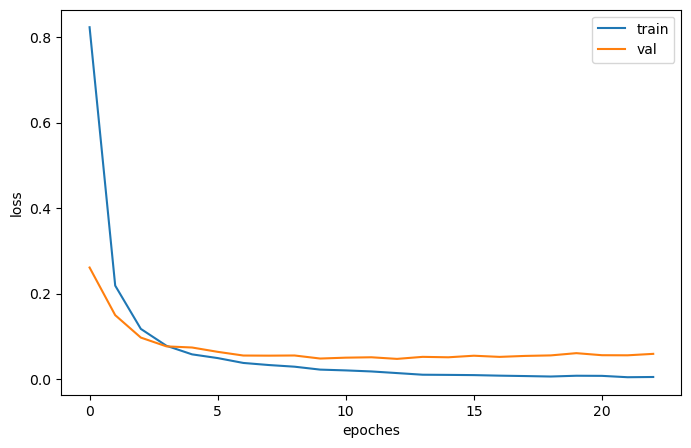

In [63]:
model2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_CNN.keras"
checkpoint = ModelCheckpoint (filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history2 = model2.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=1000,
    callbacks=[checkpoint, early_stop])
print("test 정확도: ", model2.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel ('loss')
plt.legend(['train', 'val'])
plt.show()